# Homework 2: Regression

By Natalia Frumkin and Karanraj Chauhan with the help of B. Kulis, R. Manzelli, and A. Tsiligkaridis

Using climate change datasets from NASA's Climate Change Initiative: https://climate.nasa.gov/vital-signs/

and Airline On-Time dataset from https://www.kaggle.com/giovamata/airlinedelaycauses

## Preamble

Download the `hw2` folder from here: https://github.com/nfrumkin/EC414/tree/master/homework/hw2 (or clone the EC414 repo, if you prefer).

To run and solve this assignment, you must have a working Jupyter Notebook installation.

If you followed the installation instructions for `Python 3.6.x` and `Jupyter Notebook` from discussion 1, you should be set. In the terminal (cmd for Windows users), navigate to the `hw2` folder. Then type `jupyter notebook` and press `Enter`.

If you have Anaconda, run Anaconda and choose this file (`Homework 2 - Regression.ipynb`) in Anaconda's file explorer. Use `Python 3` version.

Below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find [Week 1 discussion material](https://github.com/nfrumkin/EC414/blob/master/discussions/Week%201%20-%20Python%20Review.ipynb) useful. 

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctrl+Enter` or `[>|]`(like "play") button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. [Double]click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file to Blackboard by the due date (see Schedule). If you have pen-and-paper answers, please hand them in in class on the same day.

# Problem 1: Linear Algebra Review

Let $B$ be a 4x4 matrix to which we apply the following operations:
1. double column 2
2. interchange columns 1 and 4
3. halve row 1
4. add row 3 to row 1
5. subtract row 4 from each of the other rows
6. replace column 3 by column 4
7. delete column 2 (so that the column dimension is reduced by 1)

**a.** Write the result as a product of eight matrices.

**b.** Write it again as a product $ABC$ (same $B$) of three matrices.

**Solution handed-in by hand**

## Problem 2: Weighted Least Squares

Given an $n$  x  $d$ matrix $X$ of $n$ data points, each point
$d$-dimensional, an $n$ x $1$ vector $Y$ of observed values and an $n$ x $n$ diagonal weight matrix $A$,
deduce the closed form expression for the coefficients in the weighted linear least squares
regression problem given below. Consider both slope and bias terms as coefficients. In
weighted linear least squares, the term minimized is the weighted sum of squared distances

$\sum_{i=1}^{n}\alpha_i(y_i - \sum_{j=1}^{d}X_{ij}w_j-b)^2$

where $\alpha_i$ is the ith diagonal element of matrix A, and the other symbols have their usual
meaning.

Show all steps in your derivation.

**Solution handed-in by hand**

## Problem 3: Ordinary Least Squares Regression

Given the Greenland ice sheet mass data over the past 17 years (source: `greenland_mass.csv`):

**a.** Plot the data using matplotlib. Be sure to label axes.

**b.** Apply Ordinary Least Squares regression to the data, and predict the ice sheet mass for the time step t=2018 (that is, 1 January 2018).

**c.** Now plot the data and the regression curve in the same figure.

In [54]:
import numpy as np
import pandas as pd
import csv

from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [55]:
# read in data
greenland_df = pd.read_csv('greenland_mass.csv', index_col=0)
greenland_df.head()

,time,mass_diff,one_sigma
0,2002.29,0.00,110.39
1,2002.35,12.45,66.04
2,2002.62,-242.15,52.74
3,2002.71,-267.75,63.34
4,2002.79,-279.02,39.55


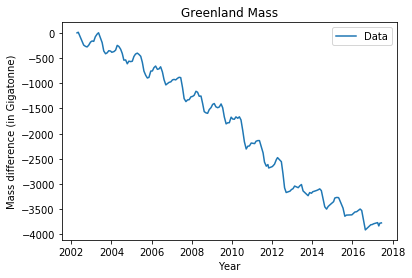

In [83]:
# part a - visualize given data
# to access time values : greenland_df['time'].values

x = greenland_df['time'].values
y = greenland_df['mass_diff'].values

plt.plot(x,y, label='Data')
plt.xlabel('Year')
plt.ylabel('Mass difference (in Gigatonne)')
plt.title('Greenland Mass')
plt.legend()
plt.show()



In [84]:
# part b
# NOTE: scikit learn cannot be used for this part. 
# solution must be coded from scratch

# fit curve using ols regression
time_values = greenland_df['time'].values
mass_values = greenland_df['mass_diff'].values
y = mass_values

size = time_values.size

# create matrix x with dimension d + 1
x = np.ones((size,2))
x[:,0] = time_values
#transpose x
xt = x.transpose()

# calculate w
w = np.linalg.inv(xt @ x) @ xt @ y

# predict using ols model
data_2018 = 2018 * w[0] + w[1]
print('2018 predicted mass variation = ', data_2018, 'gigatonnes')



2018 predicted mass variation =  -4130.5556414910825 gigatonnes


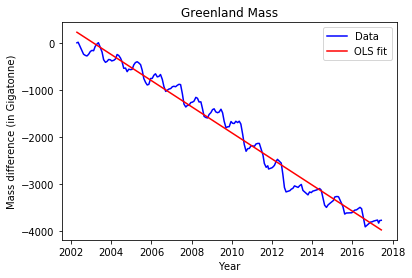

In [85]:
# part c - plotting the model with data
x1 = greenland_df['time'].values
y1 = greenland_df['mass_diff'].values

x2 = x1
y2 = x1 * w[0] + w[1]

plt.plot(x1,y1,'b', label='Data')
plt.plot(x2,y2,'r', label='OLS fit')
plt.xlabel('Year')
plt.ylabel('Mass difference (in Gigatonne)')
plt.title('Greenland Mass')
plt.legend()
plt.show()


## Problem 4: Ridge and Lasso Regression

Given the dataset of airline delays (source: `airline_delays_Xtrain.csv`, `airline_delays_ytrain.csv`). We recommend using the scikit-learn functions [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) and [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) for this problem

**a.** For values of lambda 10^3, 10^4, ..., 10^13, fit ridge regression models to the data. Plot a graph of value of coefficient (y-axis) vs log lambda (x-axis) for each coefficient, on the same figure.

**b.** For values of lambda 10^-2, 10^-1, ..., 10^6, fit lasso regression models to the data. Plot a graph of value of coefficient (y-axis) vs log lambda (x-axis) for each coefficient, on the same figure.

**c.** Comment on the difference in how the coefficient values change with log lambda for the two methods.

In [138]:
# read in training data
X_train = pd.read_csv('airline_delays_Xtrain.csv')
y_train = pd.read_csv('airline_delays_ytrain.csv')


In [139]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet 
# use Lasso and Ridge from scikit-learn
# documentation can be found here >> https://scikit-learn.org/stable/index.html

# part a

# lambda values for which to fit curve
ridge_lambdas = np.logspace(start=4, stop=14, num=22, base=10)

# exponent corresponding to the lambda value, just here for ease in graphing
ridge_exps = np.log10(ridge_lambdas)

# store the coefficients obtained for each lambda value in this ndarray
# for example, ridge_coefs[0, :] is the coefficients obtained for lambda = 10^3
ridge_coefs = np.empty((ridge_lambdas.shape[0], X_train.shape[1]))

for i in range (0,22):
    ridge_model = Ridge(alpha=ridge_lambdas[i])
    ridge_model.fit(X_train, y_train)
    ridge_coefs[i,:] = ridge_model.coef_
    

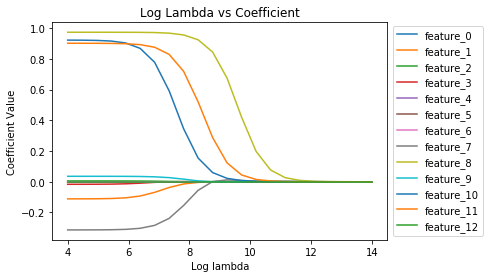

In [142]:
# make plot
features = []
for i in range (13):
    label = 'feature_' + str(i)
    features.append(label)

plt.plot(ridge_exps, ridge_coefs)
plt.xlabel('Log lambda')
plt.ylabel('Coefficient Value')
plt.title('Log Lambda vs Coefficient')
plt.legend(features, bbox_to_anchor=(0., 0.45, 1.3, .102), loc = 5, ncol = 1)
plt.show()



In [143]:
# part b

# lambda values for which to fit curve
lasso_lambdas = np.logspace(start=-2, stop=6, num=9, base=10)

# exponent corresponding to the lambda value, just here for ease in graphing
lasso_exps = np.log10(lasso_lambdas)

# store the coefficients obtained for each lambda value in this ndarray
# for example, lasso_coefs[0, :] is the coefficients obtained for lambda = 10^-2
lasso_coefs = np.empty((lasso_lambdas.shape[0], X_train.shape[1]))

for i in range(0,9):
    lasso_model = Lasso(alpha = lasso_lambdas[i])
    lasso_model.fit(X_train, y_train)
    lasso_coefs[i,:] = lasso_model.coef_


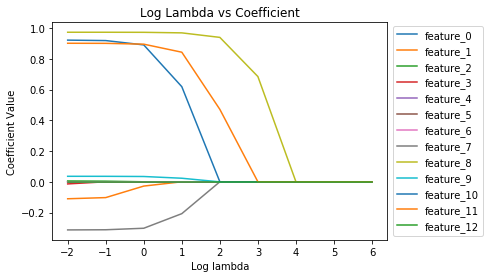

In [145]:
# make the plot
plt.plot(lasso_exps, lasso_coefs)

plt.xlabel('Log lambda')
plt.ylabel('Coefficient Value')
plt.title('Log Lambda vs Coefficient')
plt.legend(features, bbox_to_anchor=(0., 0.45, 1.3, .102), loc = 5, ncol = 1)
plt.show()

**Part c ** 

For the Ridge regression the coefficients seem to decrease slowly and they approach zero assymptotically., This funciton looks less linear than Lasso regression. Also in order to reach zero in the y-axis the log lambda has to be over 12 for some of the features.

For the Lasso regression the coefficient value seems to go faster to zero since after the value 4 for log lambda all of the features have a coefficient of zero. 